In [1]:
import torch
import gpytorch
import numpy as np
import pandas as pd
import scipy.optimize as optimize


from bo_functions import ExactGPModel
from bo_functions import test_train_split
from bo_functions import bo_iter
from bo_functions import bo_iter_w_restarts

In [2]:
#Set Parameters
Theta_True = np.array([1,-1])
q = 2
m = 1
BO_iters = 15
train_iter = 300

emulator = False
verbose = False

shuffle_seed = 6
t=4
# verbose= False

train_iter = 300
explore_bias = torch.tensor([0,0.1,0.5])

#Pull Experimental data from CSV
exp_data_doc = "exp_data.csv"
exp_data = np.array(pd.read_csv(exp_data_doc, header=0,sep=","))
Xexp = exp_data[:,1]
Yexp = exp_data[:,2]
n = len(Xexp)

#Define GP Testing space
p=20
Theta1 =  np.linspace(0.5,1.5,p) #1x10
Theta2 =  np.linspace(-1.5,-0.5,p) #1x10
Theta1 =  np.linspace(-2,2,p) #1x10
Theta2 =  np.linspace(-2,2,p) #1x10
theta_mesh = np.array(np.meshgrid(Theta1, Theta2)) #2 Uniform 5x5 arrays
theta1_mesh = theta_mesh[0]
theta2_mesh = theta_mesh[1]

Explore Bias: tensor(0.)
Restart Number:  1


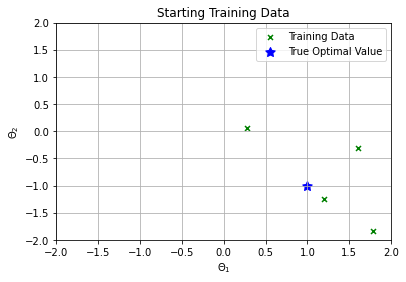

/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/gpytorch/lazy/triangular_lazy_tensor.py:130: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:1672.)
  res = torch.triangular_solve(right_tensor, self.evaluate(), upper=self.upper).solution


Magnitude of SSE given Theta_Opt =  [ 0.94048708 -0.90681654] is 3.4548e-01
Restart Number:  2


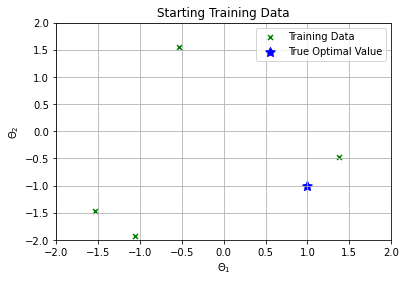

Magnitude of SSE given Theta_Opt =  [ 0.88897006 -0.90812124] is 4.1867e-01
Restart Number:  3


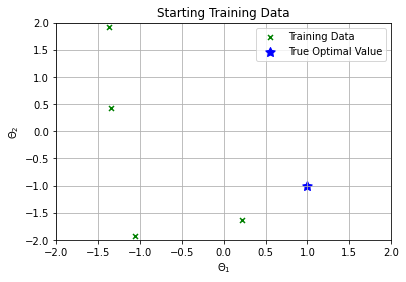

Magnitude of SSE given Theta_Opt =  [ 1.35022925 -1.11519363] is 1.6942e+00
Restart Number:  4


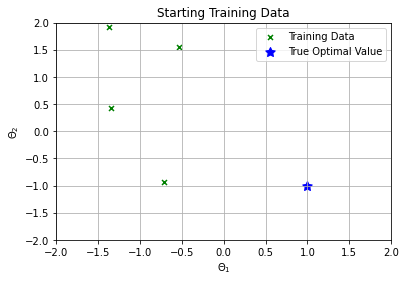

Magnitude of SSE given Theta_Opt =  [ 1.0687758  -1.18712107] is 1.2042e+00
Restart Number:  5


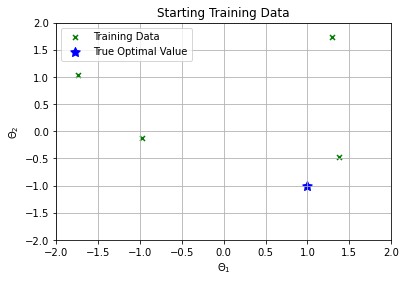

Magnitude of SSE given Theta_Opt =  [ 0.67307986 -0.90997661] is 1.3265e+00
Restart Number:  6


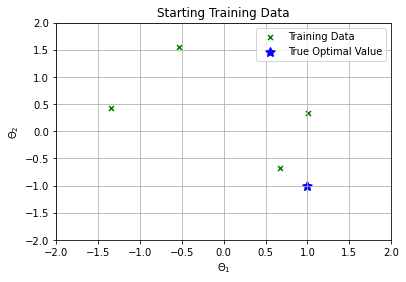

Magnitude of SSE given Theta_Opt =  [ 1.19197    -0.93829713] is 5.3571e-01
Restart Number:  7


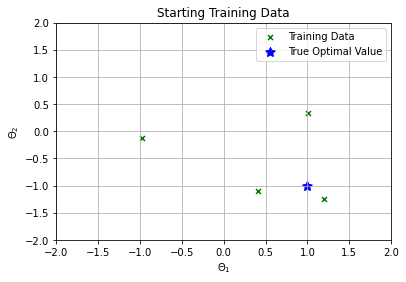

Magnitude of SSE given Theta_Opt =  [ 0.95882869 -0.88648262] is 4.7673e-01
Restart Number:  8


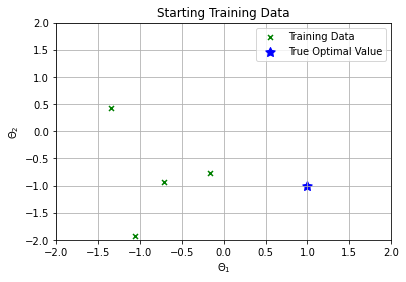

Magnitude of SSE given Theta_Opt =  [ 0.96358267 -1.16343199] is 8.8067e-01
Restart Number:  9


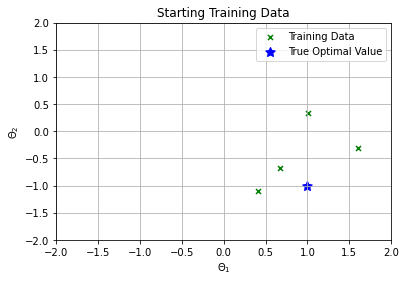

Magnitude of SSE given Theta_Opt =  [ 1.09102813 -0.95027348] is 1.8989e-01
Restart Number:  10


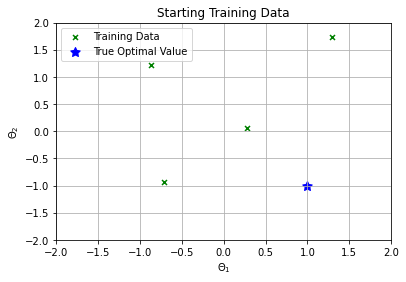

Magnitude of SSE given Theta_Opt =  [ 0.46725463 -1.29620232] is 5.6909e+00


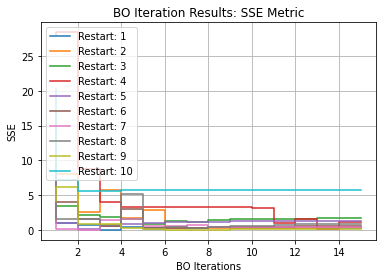

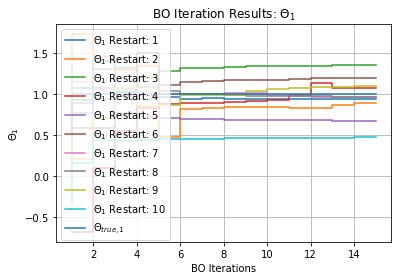

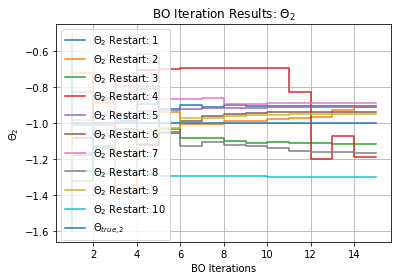

The GP predicts that the lowest SSE occurs at θ = [[ 1.02694113 -0.99013381]] during restart 0
Explore Bias: tensor(0.1000)
Restart Number:  1


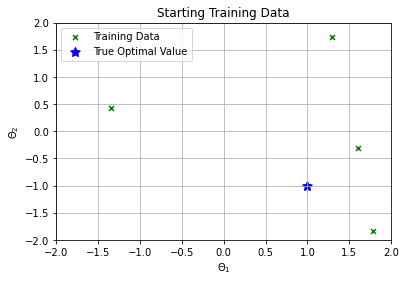

Magnitude of SSE given Theta_Opt =  [ 2.         -0.85481629] is 1.0870e+01
Restart Number:  2


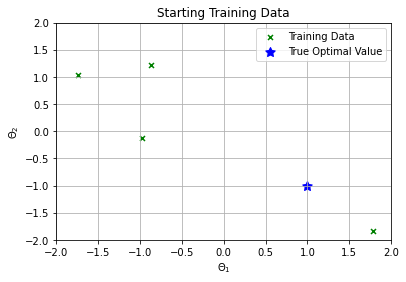

Magnitude of SSE given Theta_Opt =  [ 1.10557921 -1.00149268] is 1.2460e-01
Restart Number:  3


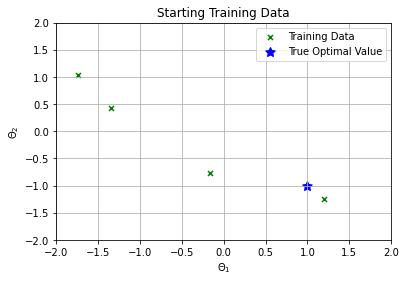

Magnitude of SSE given Theta_Opt =  [ 0.79966706 -0.96330679] is 4.3226e-01
Restart Number:  4


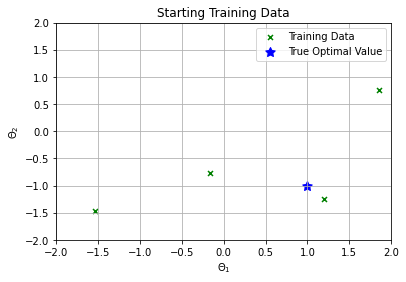

Magnitude of SSE given Theta_Opt =  [ 1.16972246 -0.77482487] is 2.0842e+00
Restart Number:  5


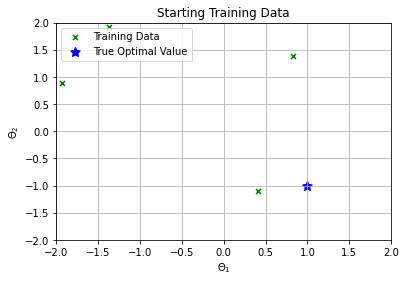

Magnitude of SSE given Theta_Opt =  [ 0.97847713 -1.02214174] is 1.4462e-02
Restart Number:  6


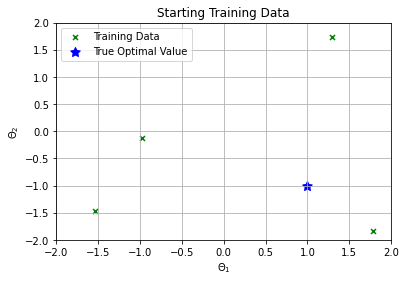

Magnitude of SSE given Theta_Opt =  [ 0.96865552 -0.95991744] is 7.0579e-02
Restart Number:  7


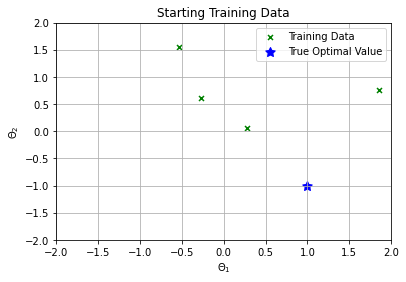

Magnitude of SSE given Theta_Opt =  [ 0.92605992 -0.94947151] is 1.4489e-01
Restart Number:  8


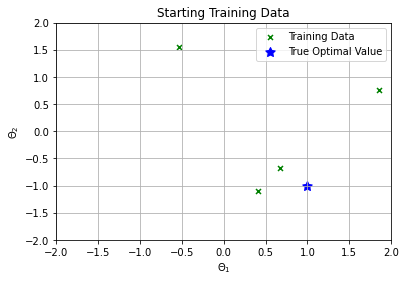

Magnitude of SSE given Theta_Opt =  [ 1.13550609 -0.90416971] is 5.3461e-01
Restart Number:  9


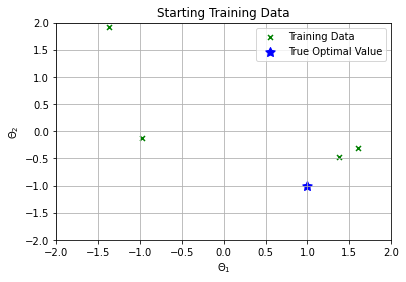

Magnitude of SSE given Theta_Opt =  [ 0.99206172 -0.99355631] is 3.3242e-03
Restart Number:  10


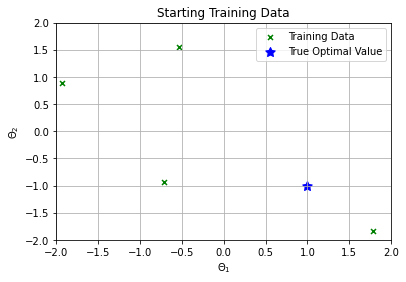

Magnitude of SSE given Theta_Opt =  [ 1.07844027 -1.06328697] is 1.9347e-01


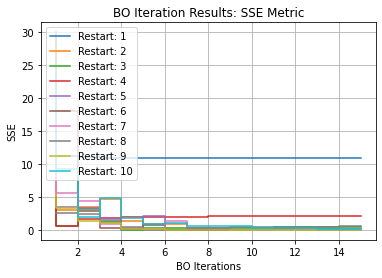

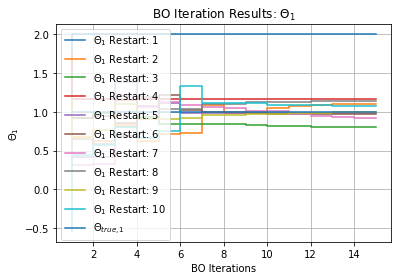

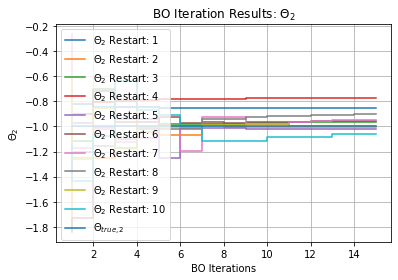

The GP predicts that the lowest SSE occurs at θ = [[ 0.99434167 -1.00248098]] during restart 1
Explore Bias: tensor(0.5000)
Restart Number:  1


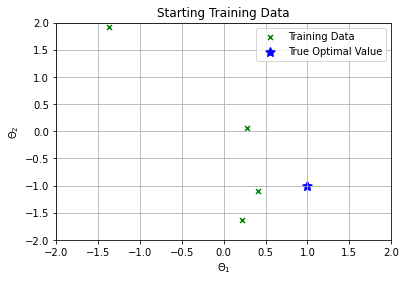

Magnitude of SSE given Theta_Opt =  [ 0.93648244 -0.91899975] is 2.7500e-01
Restart Number:  2


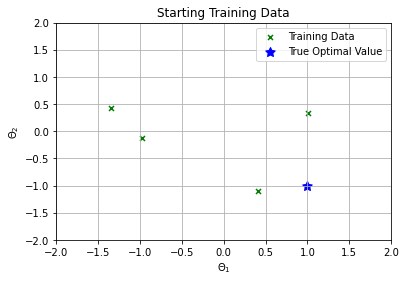

Magnitude of SSE given Theta_Opt =  [ 0.9673144  -0.92579307] is 2.1164e-01
Restart Number:  3


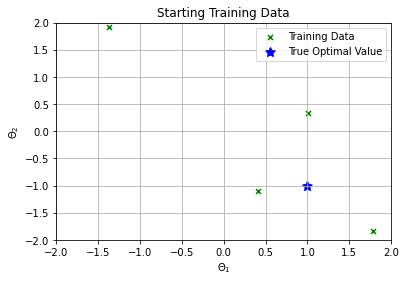

Magnitude of SSE given Theta_Opt =  [ 0.98610561 -0.94846388] is 1.0305e-01
Restart Number:  4


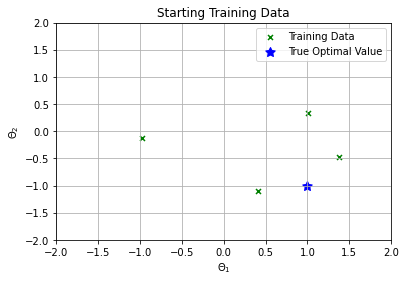

Magnitude of SSE given Theta_Opt =  [ 0.5628307  -0.84325202] is 2.7307e+00
Restart Number:  5


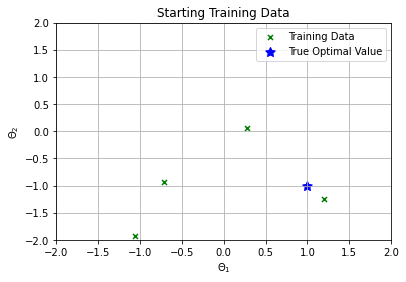

Magnitude of SSE given Theta_Opt =  [ 0.9125555  -0.93251657] is 2.3695e-01
Restart Number:  6


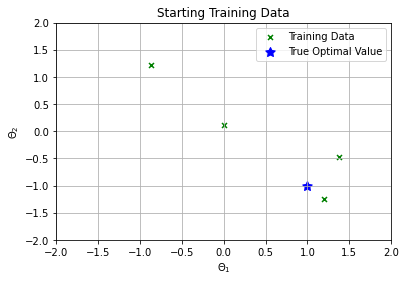

Magnitude of SSE given Theta_Opt =  [ 0.77918041 -0.90074067] is 8.1952e-01
Restart Number:  7


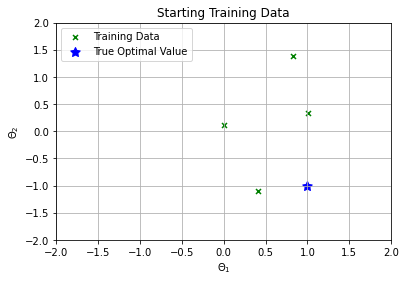

Magnitude of SSE given Theta_Opt =  [ 0.98300946 -0.94982481] is 9.8623e-02
Restart Number:  8


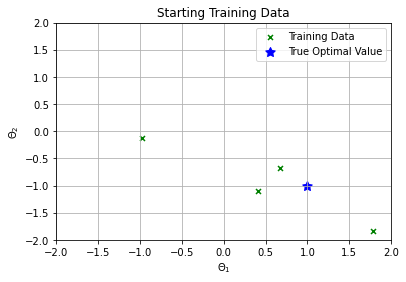

Magnitude of SSE given Theta_Opt =  [ 1.01884381 -1.11212383] is 4.0853e-01
Restart Number:  9


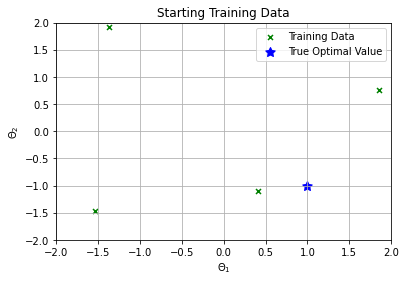

Magnitude of SSE given Theta_Opt =  [ 0.99135146 -0.99725895] is 1.3593e-03
Restart Number:  10


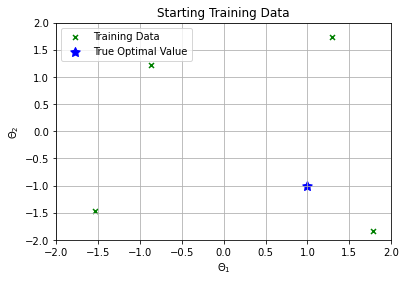

Magnitude of SSE given Theta_Opt =  [ 0.95381006 -1.03369242] is 4.7518e-02


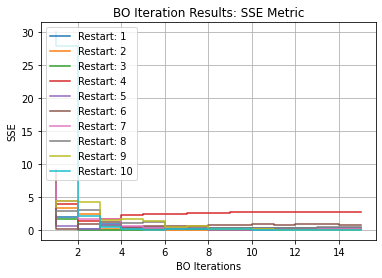

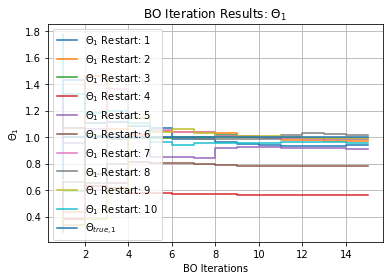

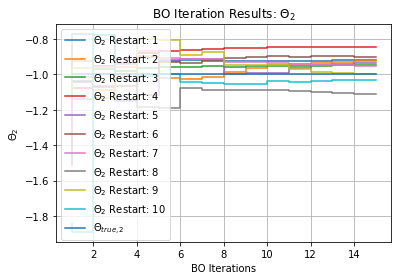

The GP predicts that the lowest SSE occurs at θ = [[ 0.99135146 -0.99725895]] during restart 8


In [3]:
save_fig=False
obj = "LN_obj"
shuffle_seed = None
restarts = 10

all_data_doc = "all_2_ln_obj_data.csv"
all_data = np.array(pd.read_csv(all_data_doc, header=0,sep=","))   

for i in range(len(explore_bias)):
    print("Explore Bias:", explore_bias[i])
    results = bo_iter_w_restarts(BO_iters,all_data_doc,p,q,m,t,theta_mesh,Theta_True,train_iter,explore_bias[i], Xexp, Yexp, obj,
                       restarts, verbose,save_fig,emulator, shuffle_seed)
    print("The GP predicts that the lowest SSE occurs at \u03B8 =", results[1], "during restart", results[0])

Explore Bias: tensor(0.)
Restart Number:  1


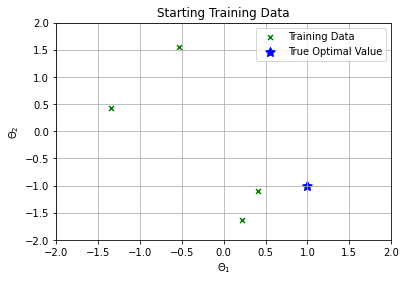

Magnitude of SSE given Theta_Opt =  [ 1.16776559 -0.88036115] is 8.1613e-01
Restart Number:  2


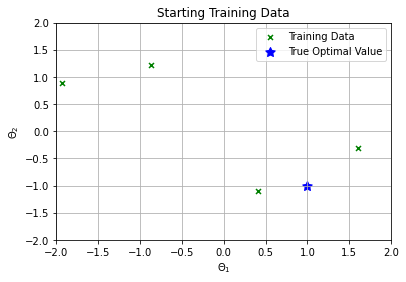

Magnitude of SSE given Theta_Opt =  [ 0.86605991 -1.00950864] is 1.6507e-01
Restart Number:  3


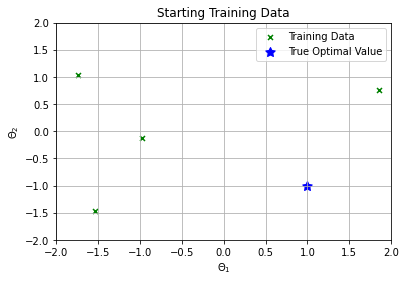

Magnitude of SSE given Theta_Opt =  [ 0.28808646 -1.20480468] is 6.3634e+00
Restart Number:  4


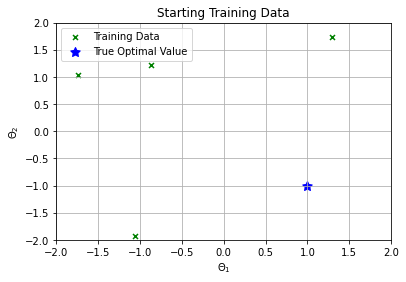

Magnitude of SSE given Theta_Opt =  [ 0.86603705 -0.9864637 ] is 1.7352e-01
Restart Number:  5


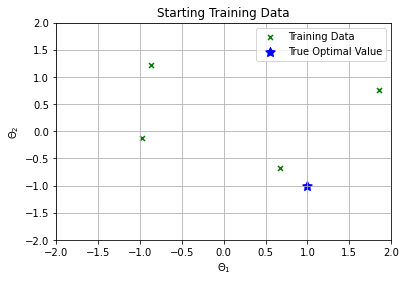

Magnitude of SSE given Theta_Opt =  [ 0.55110829 -1.11038611] is 2.3513e+00
Restart Number:  6


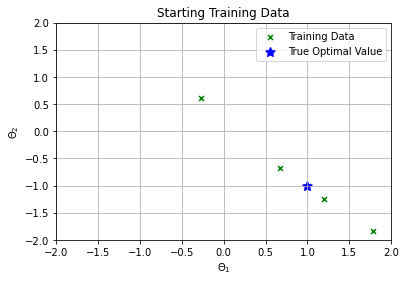

Magnitude of SSE given Theta_Opt =  [ 0.85953775 -1.06701306] is 3.1872e-01
Restart Number:  7


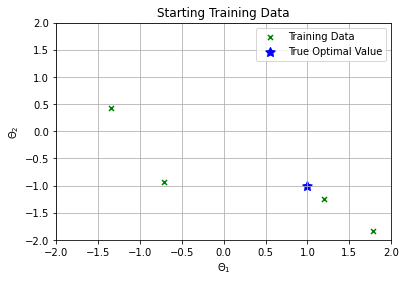

Magnitude of SSE given Theta_Opt =  [ 0.73258841 -1.0412227 ] is 7.3229e-01
Restart Number:  8


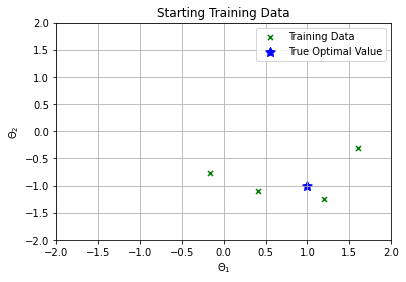

Magnitude of SSE given Theta_Opt =  [ 0.79901672 -0.86855394] is 9.9801e-01
Restart Number:  9


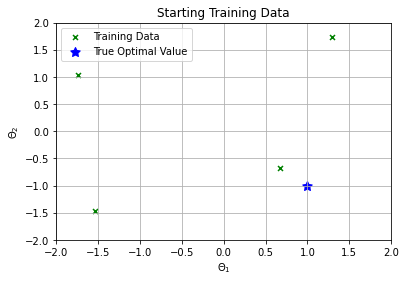

Magnitude of SSE given Theta_Opt =  [ 0.94167654 -1.15994028] is 8.6121e-01
Restart Number:  10


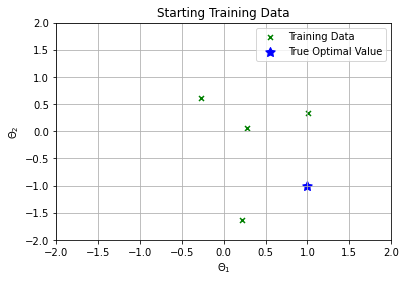

Magnitude of SSE given Theta_Opt =  [ 0.99235651 -1.22104668] is 1.6115e+00


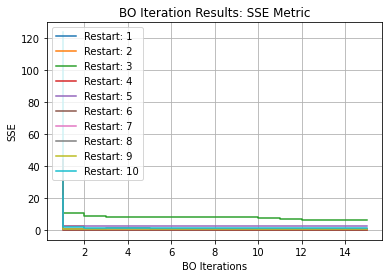

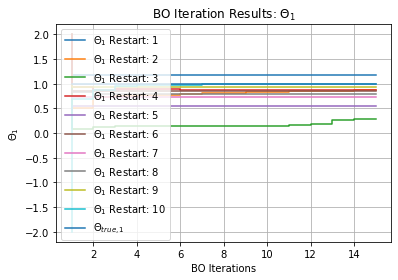

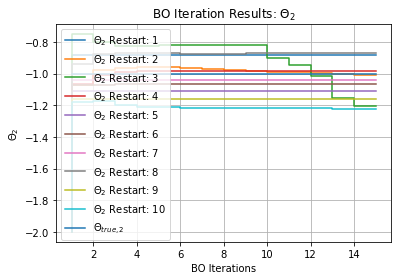

The GP predicts that the lowest SSE occurs at θ = [[ 0.88520317 -0.98762075]] during restart 3
Explore Bias: tensor(0.1000)
Restart Number:  1


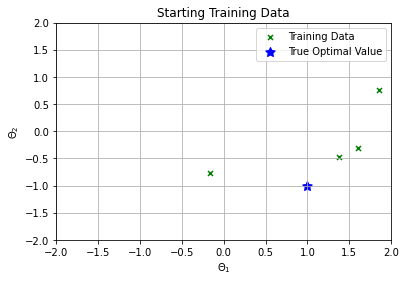

Magnitude of SSE given Theta_Opt =  [ 1.36150931 -1.03941271] is 1.3947e+00
Restart Number:  2


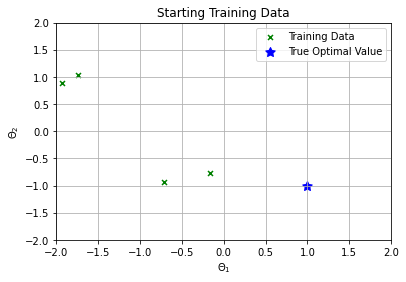

Magnitude of SSE given Theta_Opt =  [ 0.89990177 -1.05600375] is 1.8290e-01
Restart Number:  3


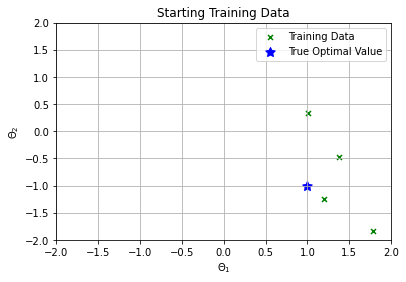

Magnitude of SSE given Theta_Opt =  [ 0.72977933 -1.25244364] is 2.8080e+00
Restart Number:  4


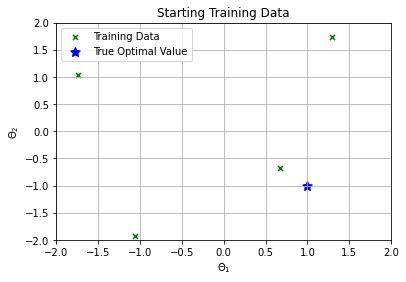

Magnitude of SSE given Theta_Opt =  [ 1.11319113 -1.1187634 ] is 5.9499e-01
Restart Number:  5


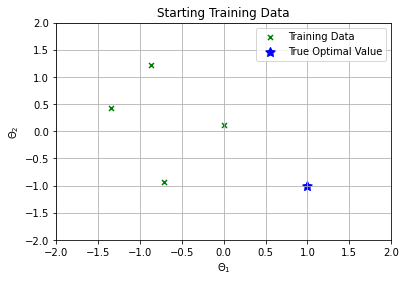

Magnitude of SSE given Theta_Opt =  [ 1.08525625 -0.56479193] is 6.6224e+00
Restart Number:  6


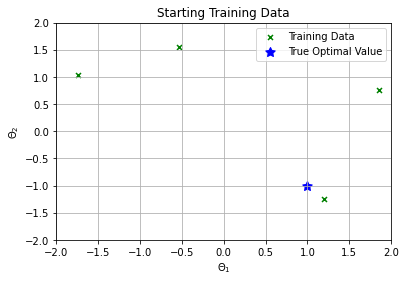

Magnitude of SSE given Theta_Opt =  [ 0.68738581 -1.09981442] is 1.2567e+00
Restart Number:  7


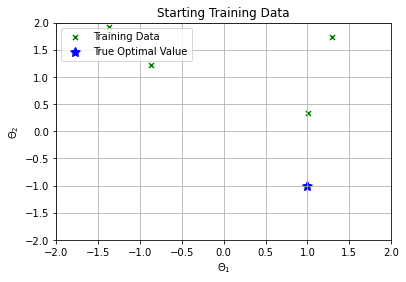

Magnitude of SSE given Theta_Opt =  [ 0.62700944 -0.84431896] is 2.2068e+00
Restart Number:  8


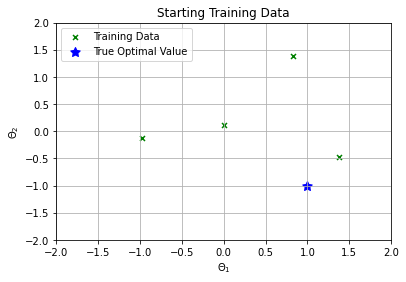

Magnitude of SSE given Theta_Opt =  [ 1.26109097 -1.11241261] is 1.1178e+00
Restart Number:  9


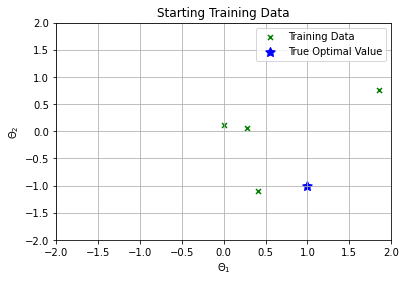

Magnitude of SSE given Theta_Opt =  [ 0.97479428 -1.23535432] is 1.8339e+00
Restart Number:  10


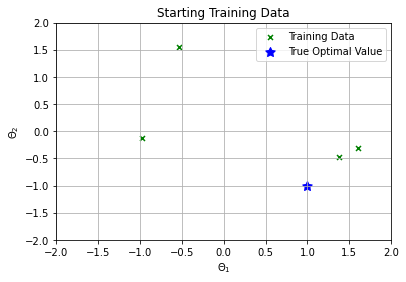

Magnitude of SSE given Theta_Opt =  [ 1.12734272 -1.35853723] is 4.4673e+00


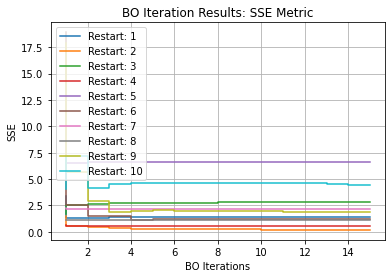

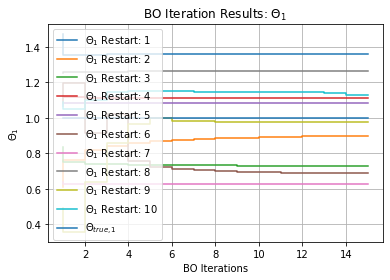

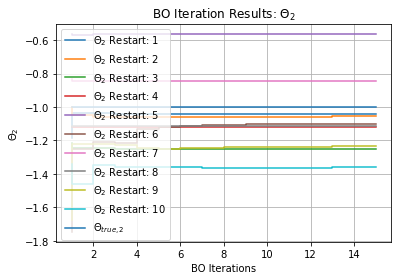

The GP predicts that the lowest SSE occurs at θ = [[ 0.89990177 -1.05600375]] during restart 1
Explore Bias: tensor(0.5000)
Restart Number:  1


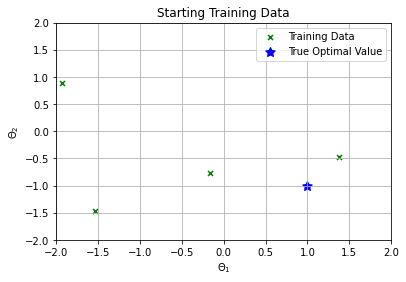

Magnitude of SSE given Theta_Opt =  [ 0.62893979 -1.09286298] is 1.6054e+00
Restart Number:  2


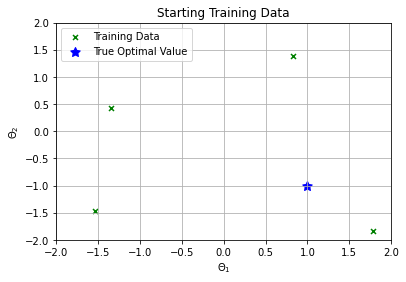

Magnitude of SSE given Theta_Opt =  [ 2.         -0.86498466] is 1.0771e+01
Restart Number:  3


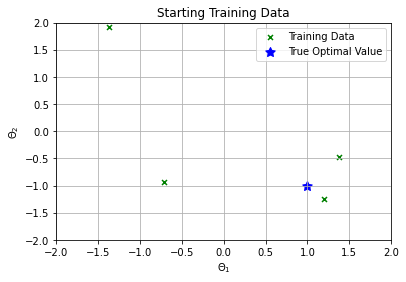

Magnitude of SSE given Theta_Opt =  [ 0.73534842 -1.09759059] is 9.7116e-01
Restart Number:  4


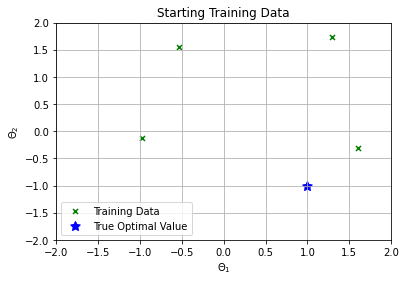

Magnitude of SSE given Theta_Opt =  [ 1.80994215 -1.02679312] is 6.6760e+00
Restart Number:  5


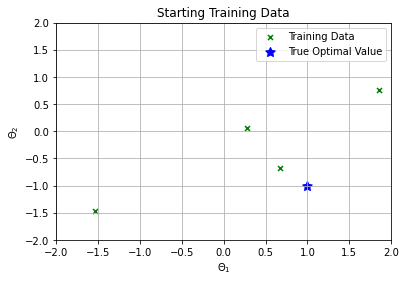

Magnitude of SSE given Theta_Opt =  [ 0.79098388 -1.2313223 ] is 2.1794e+00
Restart Number:  6


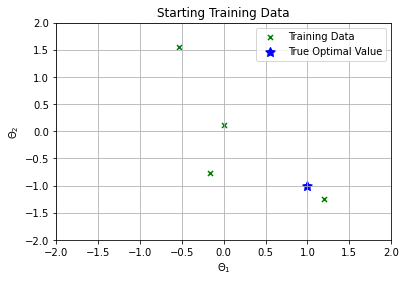

Magnitude of SSE given Theta_Opt =  [ 1.12453954 -0.82886782] is 1.2054e+00
Restart Number:  7


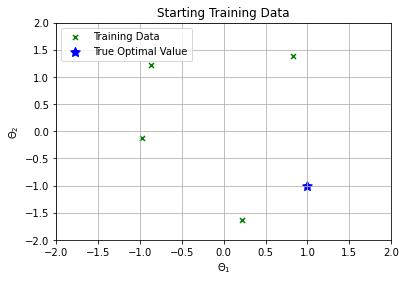

Magnitude of SSE given Theta_Opt =  [ 0.37875626 -1.00879976] is 3.7866e+00
Restart Number:  8


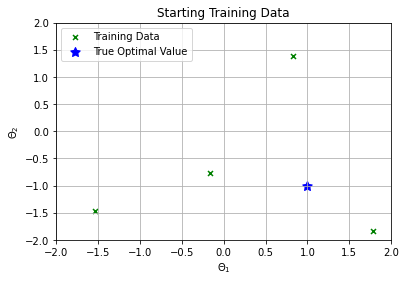

Magnitude of SSE given Theta_Opt =  [ 0.56170651 -1.14389173] is 2.5406e+00
Restart Number:  9


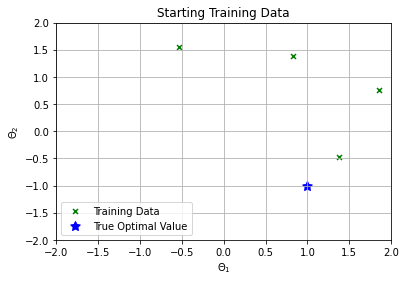

Magnitude of SSE given Theta_Opt =  [ 1.3296375  -1.09796586] is 1.4308e+00
Restart Number:  10


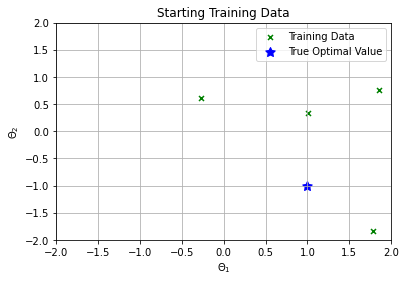

Magnitude of SSE given Theta_Opt =  [ 0.89785323 -0.94697151] is 2.0056e-01


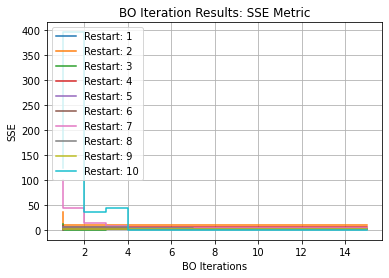

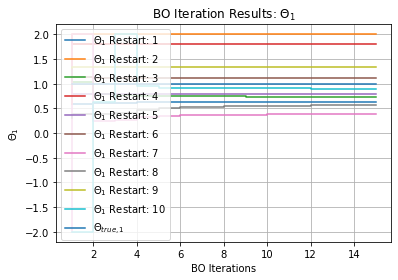

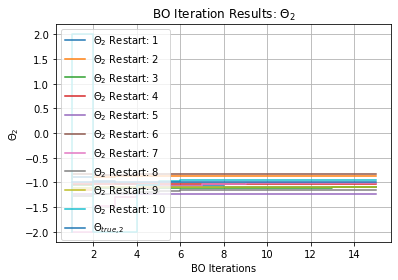

The GP predicts that the lowest SSE occurs at θ = [[ 1.04144098 -1.0495797 ]] during restart 2


In [4]:
save_fig=False
obj = "obj"
shuffle_seed = None
restarts = 10

all_data_doc = "all_2_data.csv"
all_data = np.array(pd.read_csv(all_data_doc, header=0,sep=","))   

for i in range(len(explore_bias)):
    print("Explore Bias:", explore_bias[i])
    results = bo_iter_w_restarts(BO_iters,all_data_doc,p,q,m,t,theta_mesh,Theta_True,train_iter,explore_bias[i], Xexp, Yexp, obj,
                       restarts, verbose,save_fig,emulator, shuffle_seed)
    print("The GP predicts that the lowest SSE occurs at \u03B8 =", results[1], "during restart", results[0])

Explore Bias: tensor(0.)
Magnitude of SSE given Theta_Opt =  [ 1.13843259 -0.85878685] is 9.1905e-01


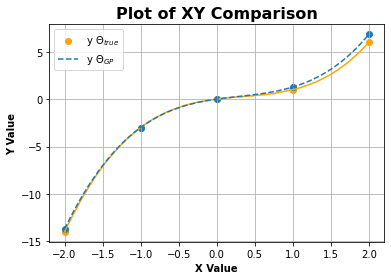

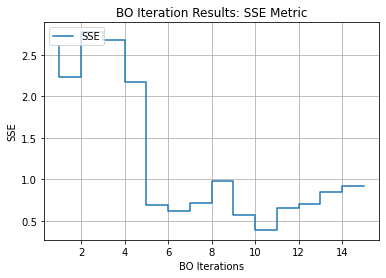

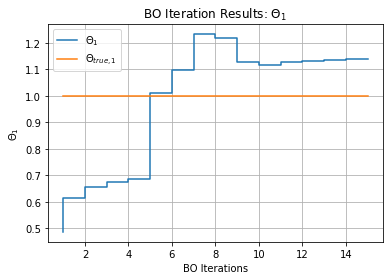

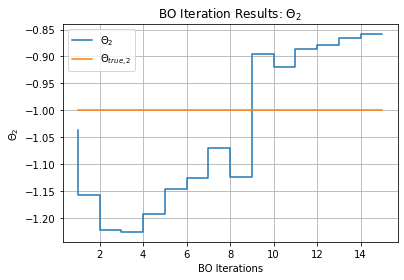

Explore Bias: tensor(0.1000)
Magnitude of SSE given Theta_Opt =  [ 1.05096866 -0.97673218] is 5.6535e-02


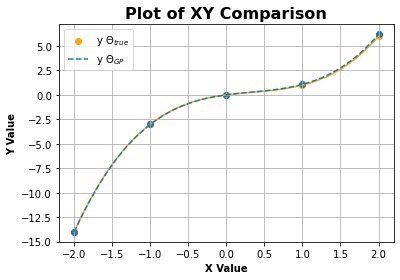

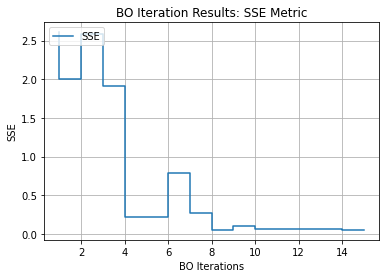

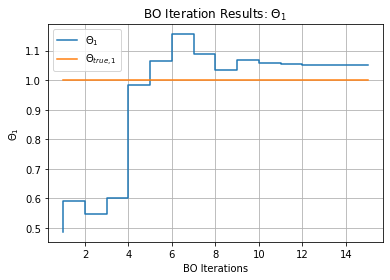

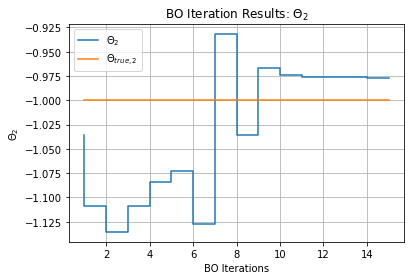

Explore Bias: tensor(0.5000)
Magnitude of SSE given Theta_Opt =  [ 1.0039045  -1.07045391] is 1.5414e-01


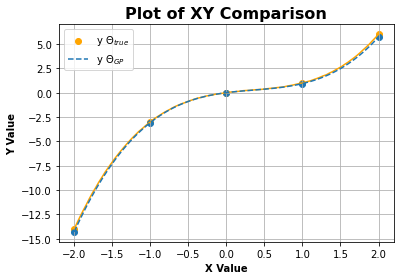

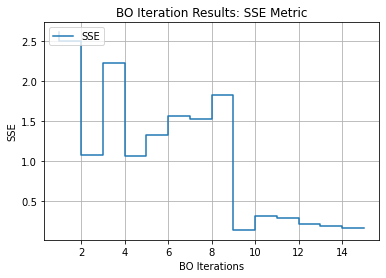

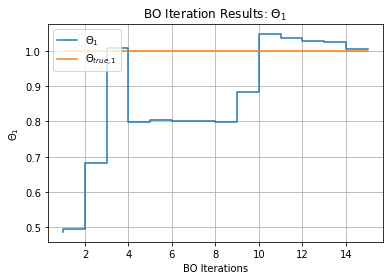

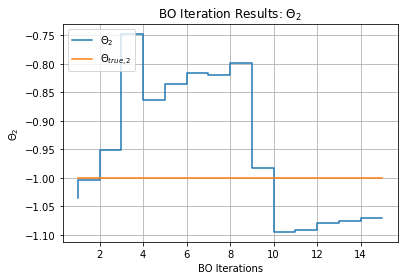

In [5]:
##Objective function = ln(SSE)
##USING SCIPY METHOD
##Uses 4 LHS points

save_fig=False
obj = "LN_obj"
restarts = 0

#Pull training data from CSV
#Separate training and testing data, uses default of an 80%/20% split
all_data_doc = "all_2_ln_obj_data.csv"
all_data = np.array(pd.read_csv(all_data_doc, header=0,sep=","))
train_data, test_data = test_train_split(all_data, shuffle_seed=shuffle_seed)
train_T = train_data[:,1:(q+1)]
train_ln_sse = train_data[:,-1]
t = 4 #Just use last 4 points
train_T = train_T[0:t]
train_ln_sse = train_ln_sse[0:t]

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_T, train_ln_sse, likelihood)


for i in range(len(explore_bias)):
    print("Explore Bias:", explore_bias[i])
    BO_Results = bo_iter(BO_iters,train_T,train_ln_sse,p,q,m,theta_mesh,Theta_True,train_iter,explore_bias[i], Xexp, 
                          Yexp, obj, restarts, verbose = verbose,save_fig=save_fig,emulator = emulator)
    if verbose == True:
        print("Exploration Parameter:",explore_bias[i] )
        print("Best_GP_Theta \n",BO_Results[0])
        print("\n Optimal_GP_Theta \n",BO_Results[1])
        print("\n Total SSE \n", BO_Results[2], "\n")

Explore Bias: tensor(0.)
Magnitude of SSE given Theta_Opt =  [ 0.81506328 -1.27383718] is 2.8080e+00


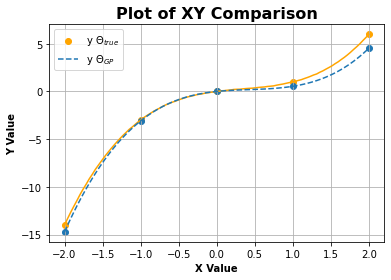

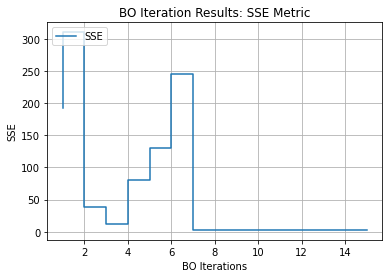

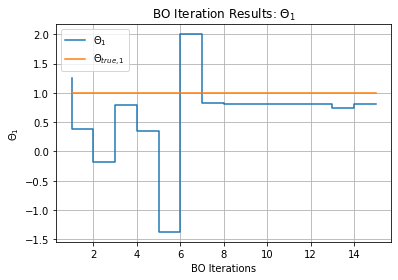

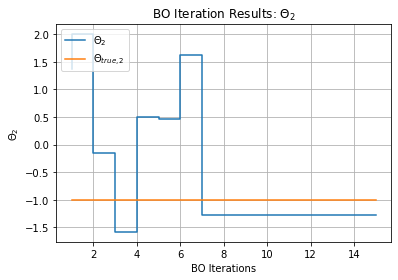

Explore Bias: tensor(0.1000)
Magnitude of SSE given Theta_Opt =  [ 0.78179055 -1.26549181] is 2.7870e+00


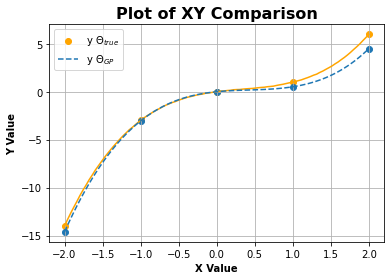

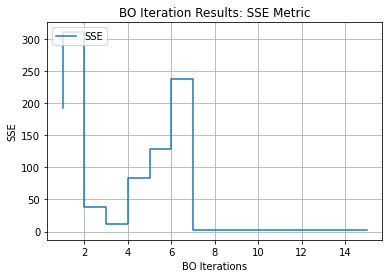

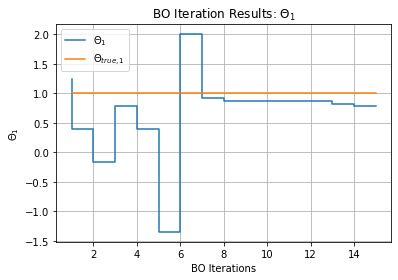

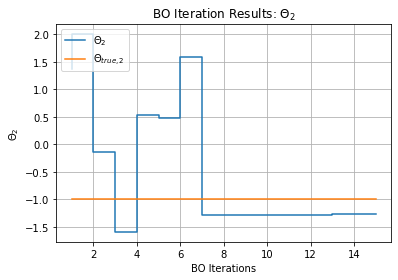

Explore Bias: tensor(0.5000)
Magnitude of SSE given Theta_Opt =  [ 0.8064365  -1.24428646] is 2.3257e+00


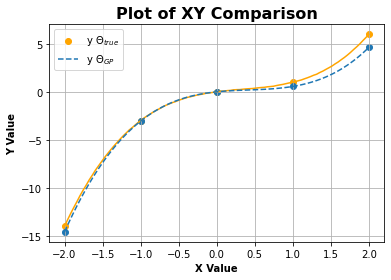

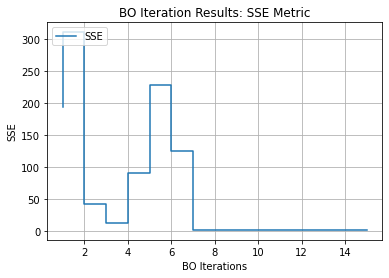

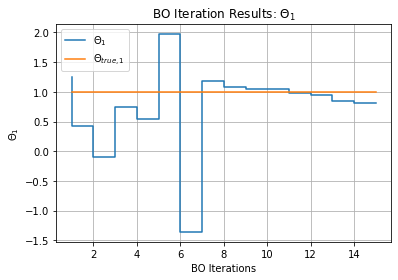

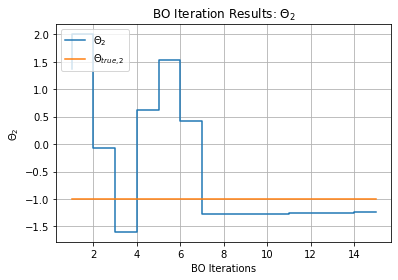

In [6]:
##Objective function = SSE
##USING SCIPY METHOD
##Uses 4 LHS Training points
shuffle_seed = 6
obj = "obj"
save_fig=False
restarts = 0

#Set 4 Point Training data, Model, and Likelihood
#Pull training data from CSV
#Separate training and testing data, uses default of an 80%/20% split
all_data_doc = "all_2_data.csv"
all_data = np.array(pd.read_csv(all_data_doc, header=0,sep=","))
train_data, test_data = test_train_split(all_data, shuffle_seed=shuffle_seed)
train_T = train_data[:,1:(q+1)]
train_sse = train_data[:,-1]
t = 4 #Just use last 4 points
train_T = train_T[0:t]
train_ln_sse = train_ln_sse[0:t]

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_T, train_sse, likelihood)

for i in range(len(explore_bias)):
    print("Explore Bias:", explore_bias[i])
    BO_Results = bo_iter(BO_iters,train_T,train_ln_sse,p,q,m,theta_mesh,Theta_True,train_iter,explore_bias[i], Xexp, 
                          Yexp, obj, restarts, verbose = verbose,save_fig=save_fig,emulator = emulator)
    if verbose == True:
        print("Exploration Parameter:",explore_bias[i] )
        print("Best_GP_Theta \n",BO_Results[0])
        print("\n Optimal_GP_Theta \n",BO_Results[1])
        print("\n Total SSE \n", BO_Results[2], "\n")

Explore Bias: tensor(0.)
Magnitude of SSE given Theta_Opt =  [ 0.9915106  -1.09833372] is 3.0689e-01


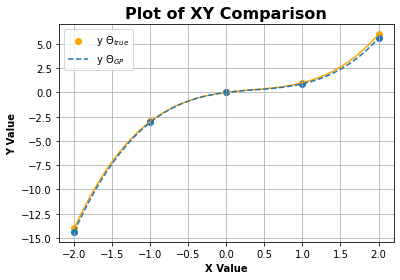

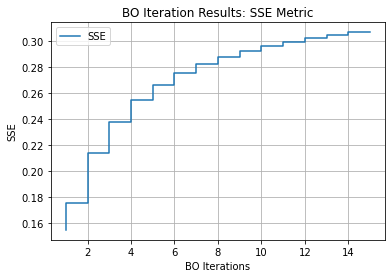

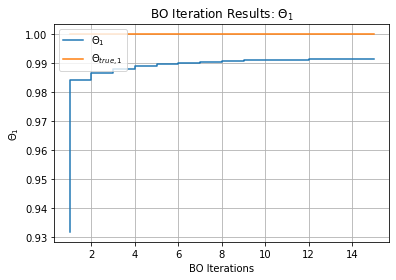

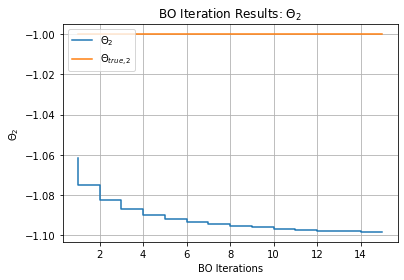

Explore Bias: tensor(0.1000)
Magnitude of SSE given Theta_Opt =  [ 0.99221736 -1.09850353] is 3.0795e-01


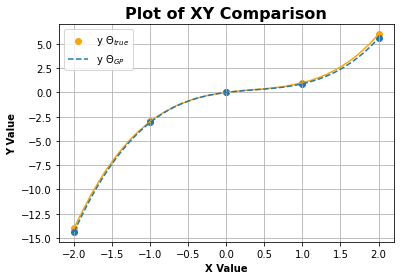

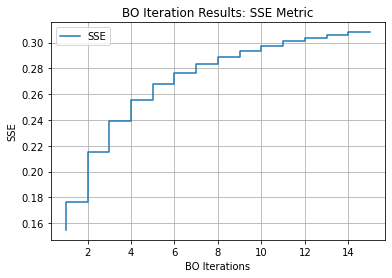

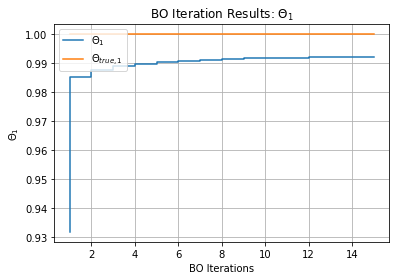

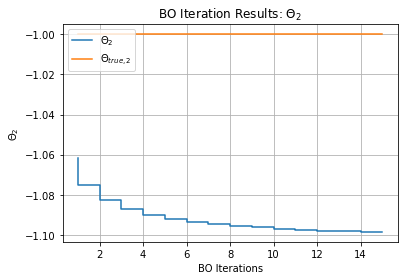

Explore Bias: tensor(0.5000)
Magnitude of SSE given Theta_Opt =  [ 0.99529335 -1.09939588] is 3.1374e-01


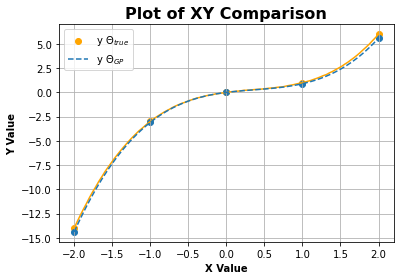

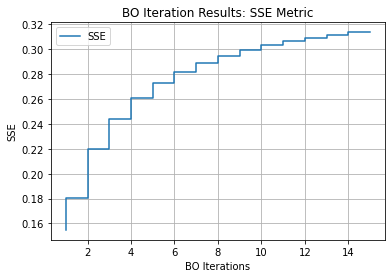

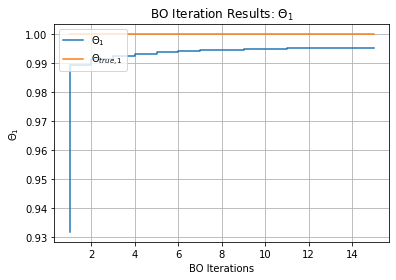

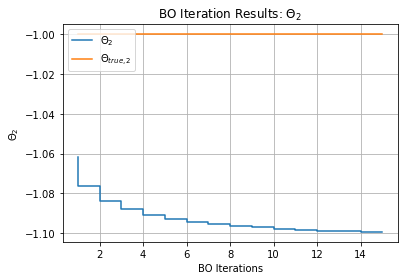

In [7]:
##Objective function = ln(SSE)
##USING SCIPY METHOD
##Uses 20 LHS points

save_fig=False
obj = "LN_obj"
restarts = 0

#Pull training data from CSV
#Separate training and testing data, uses default of an 80%/20% split
all_data_doc = "all_2_ln_obj_data.csv"
all_data = np.array(pd.read_csv(all_data_doc, header=0,sep=","))
train_data, test_data = test_train_split(all_data, shuffle_seed=shuffle_seed)
train_T = train_data[:,1:(q+1)]
train_ln_sse = train_data[:,-1]

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_T, train_ln_sse, likelihood)

for i in range(len(explore_bias)):
    print("Explore Bias:", explore_bias[i])
    BO_Results = bo_iter(BO_iters,train_T,train_ln_sse,p,q,m,theta_mesh,Theta_True,train_iter,explore_bias[i], Xexp, 
                          Yexp, obj, restarts, verbose = verbose,save_fig=save_fig,emulator = emulator)
    if verbose == True:
        print("Exploration Parameter:",explore_bias[i] )
        print("Best_GP_Theta \n",BO_Results[0])
        print("\n Optimal_GP_Theta \n",BO_Results[1])
        print("\n Total SSE \n", BO_Results[2], "\n")

Explore Bias: tensor(0.)
Magnitude of SSE given Theta_Opt =  [ 0.81202675 -0.93109464] is 5.0872e-01


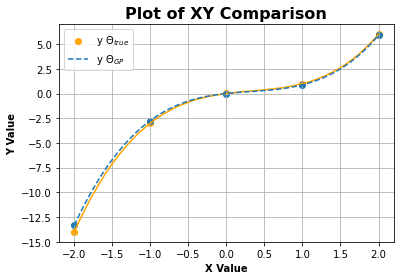

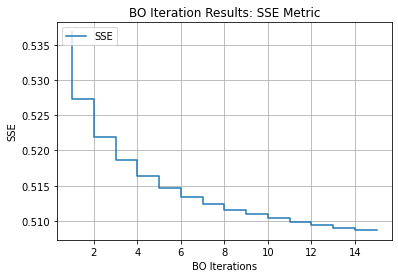

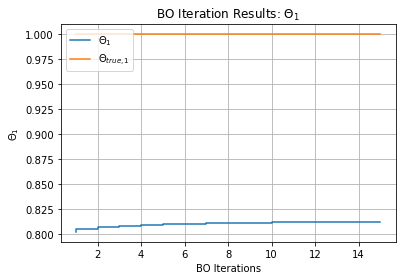

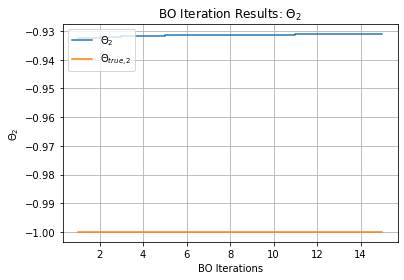

Explore Bias: tensor(0.1000)
Magnitude of SSE given Theta_Opt =  [ 0.81203868 -0.93109247] is 5.0869e-01


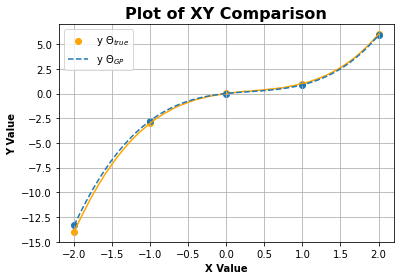

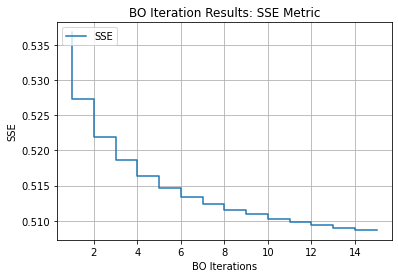

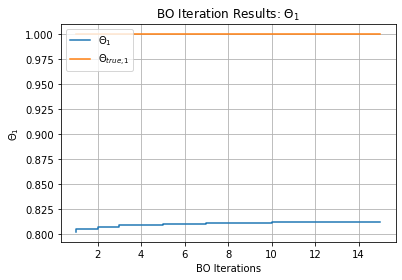

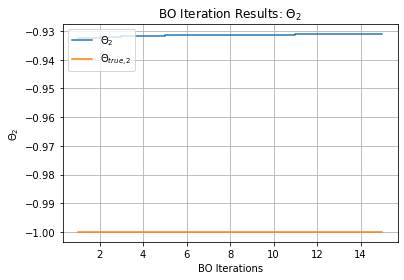

Explore Bias: tensor(0.5000)
Magnitude of SSE given Theta_Opt =  [ 0.81209259 -0.93108343] is 5.0854e-01


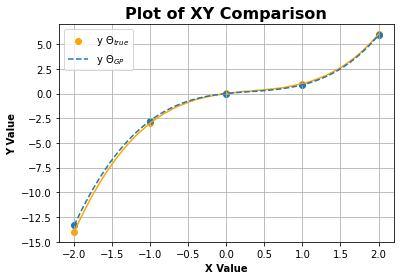

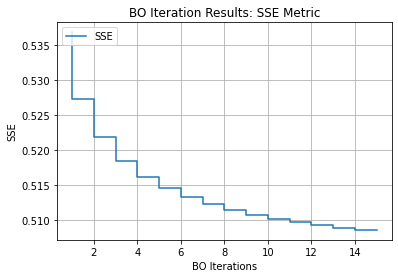

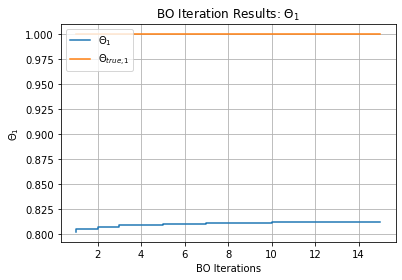

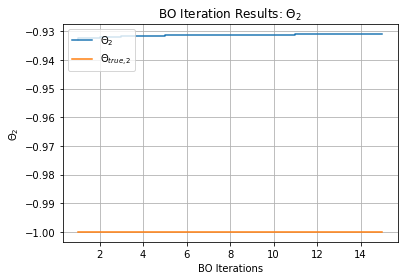

In [8]:
##Objective function = SSE
##USING SCIPY METHOD
##Uses 20 LHS Training points
save_fig=False
obj = "obj"
restarts = 0

#Set 20 Point Training data, Model, and Likelihood
#Pull training data from CSV
#Separate training and testing data, uses default of an 80%/20% split
all_data_doc = "all_2_data.csv"
all_data = np.array(pd.read_csv(all_data_doc, header=0,sep=","))
train_data, test_data = test_train_split(all_data, shuffle_seed=shuffle_seed)
train_T = train_data[:,1:(q+1)]
train_sse = train_data[:,-1]

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_T, train_sse, likelihood)

for i in range(len(explore_bias)):
    print("Explore Bias:", explore_bias[i])
    BO_Results = bo_iter(BO_iters,train_T,train_sse,p,q,m,theta_mesh,Theta_True,train_iter,explore_bias[i], Xexp, 
                          Yexp, obj, restarts, verbose = verbose,save_fig=save_fig,emulator = emulator)
    if verbose == True:
        print("Exploration Parameter:",explore_bias[i] )
        print("Best_GP_Theta \n",BO_Results[0])
        print("\n Optimal_GP_Theta \n",BO_Results[1])
        print("\n Total SSE \n", BO_Results[2], "\n")